In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation,Dropout

In [3]:
train_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Train'

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [5]:
img_rows = 30
img_cols = 30
batch_size = 64

In [7]:
train_generator = train_datagen.flow_from_directory(
					train_dir,
					target_size=(img_rows,img_cols),
					class_mode='categorical',
                    batch_size = batch_size,
					shuffle=False,
                    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
					train_dir,
					target_size=(img_rows,img_cols),
					class_mode='categorical',
                    batch_size = batch_size,
					shuffle=False,
                    subset = 'validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [29]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(5,5),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(5,5),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))



model.add(Dense(43,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 30, 30, 32)        2432      
_________________________________________________________________
activation_94 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 30, 30, 32)        25632     
_________________________________________________________________
activation_95 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 15, 15, 64)      

In [30]:
nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
epochs=5

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/5
490/490 [==============================] - 266s 542ms/step - loss: 3.6929 - accuracy: 0.0467 - val_loss: 3.5296 - val_accuracy: 0.0553
Epoch 2/5
490/490 [==============================] - 255s 520ms/step - loss: 3.5516 - accuracy: 0.0506 - val_loss: 3.5014 - val_accuracy: 0.0549
Epoch 3/5
490/490 [==============================] - 250s 509ms/step - loss: 3.3918 - accuracy: 0.0964 - val_loss: 2.8880 - val_accuracy: 0.1980
Epoch 4/5
490/490 [==============================] - 249s 509ms/step - loss: 2.6557 - accuracy: 0.2392 - val_loss: 2.2088 - val_accuracy: 0.3412
Epoch 5/5
490/490 [==============================] - 238s 485ms/step - loss: 2.2017 - accuracy: 0.3315 - val_loss: 1.9845 - val_accuracy: 0.4307


In [31]:
epochs=15

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/15
490/490 [==============================] - 238s 487ms/step - loss: 1.8518 - accuracy: 0.4149 - val_loss: 1.6174 - val_accuracy: 0.5060
Epoch 2/15
490/490 [==============================] - 290s 592ms/step - loss: 1.5664 - accuracy: 0.4989 - val_loss: 1.3339 - val_accuracy: 0.6078
Epoch 3/15
490/490 [==============================] - 294s 600ms/step - loss: 1.3375 - accuracy: 0.5592 - val_loss: 1.0469 - val_accuracy: 0.6820
Epoch 4/15
490/490 [==============================] - 297s 606ms/step - loss: 1.0950 - accuracy: 0.6385 - val_loss: 0.8185 - val_accuracy: 0.7377
Epoch 5/15
490/490 [==============================] - 310s 632ms/step - loss: 0.8917 - accuracy: 0.7048 - val_loss: 0.6023 - val_accuracy: 0.8081
Epoch 6/15
490/490 [==============================] - 295s 602ms/step - loss: 0.7187 - accuracy: 0.7644 - val_loss: 0.5328 - val_accuracy: 0.8341
Epoch 7/15
490/490 [==============================] - 281s 574ms/step - loss: 0.6001 - accuracy: 0.8014 - val_loss: 0.4611 -

In [32]:
epochs=5

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/5
490/490 [==============================] - 230s 469ms/step - loss: 0.2019 - accuracy: 0.9361 - val_loss: 0.3014 - val_accuracy: 0.9132
Epoch 2/5
490/490 [==============================] - 233s 475ms/step - loss: 0.1818 - accuracy: 0.9426 - val_loss: 0.2353 - val_accuracy: 0.9305
Epoch 3/5
490/490 [==============================] - 232s 474ms/step - loss: 0.2022 - accuracy: 0.9366 - val_loss: 0.2976 - val_accuracy: 0.9069
Epoch 4/5
490/490 [==============================] - 231s 472ms/step - loss: 0.1680 - accuracy: 0.9437 - val_loss: 0.2333 - val_accuracy: 0.9321
Epoch 5/5
490/490 [==============================] - 235s 480ms/step - loss: 0.1541 - accuracy: 0.9518 - val_loss: 0.2552 - val_accuracy: 0.9256


In [33]:
epochs=3

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                validation_data = validation_generator,
                validation_steps = nb_validation_samples//batch_size)

Epoch 1/3
490/490 [==============================] - 233s 476ms/step - loss: 0.1394 - accuracy: 0.9541 - val_loss: 0.2113 - val_accuracy: 0.9371
Epoch 2/3
490/490 [==============================] - 233s 475ms/step - loss: 0.1188 - accuracy: 0.9618 - val_loss: 0.2139 - val_accuracy: 0.9376
Epoch 3/3
490/490 [==============================] - 232s 473ms/step - loss: 0.1166 - accuracy: 0.9631 - val_loss: 0.2664 - val_accuracy: 0.9228


In [34]:
model.save('traffic_sign_model.h5')

In [35]:
import cv2
import numpy as np

8


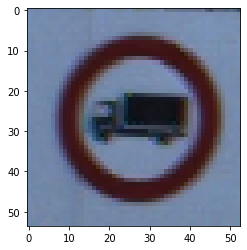

In [41]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00000.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)

1


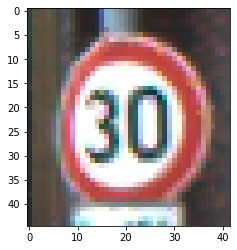

In [42]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00001.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)

32


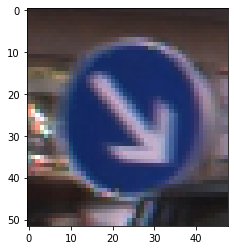

In [43]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00002.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)

6


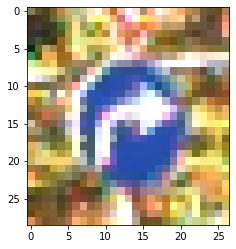

In [44]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00003.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)

3


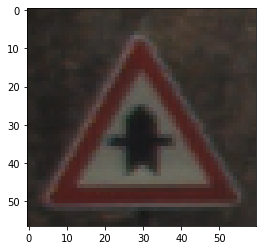

In [45]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00004.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)

40


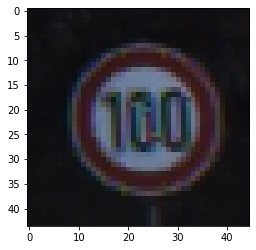

In [46]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00011.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)

16


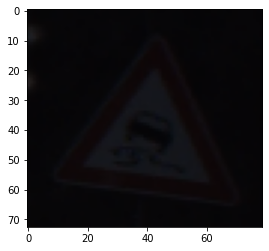

In [47]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00012.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)

6


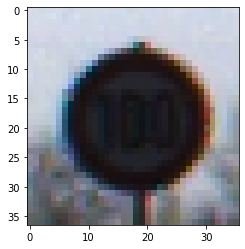

In [48]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00013.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)

42


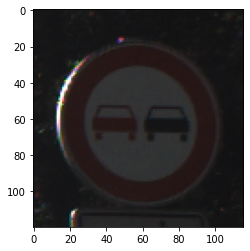

In [49]:
test_dir = '/Users/varun/documents/Deep_Learning/traffif_sign/Test'

im = cv2.imread(test_dir + '/00022.png')
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
im = cv2.resize(im,(30,30))
im = np.expand_dims(im,axis = 0)
im = im/255
ids = model.predict(im)
id_no = ids.argmax()
print(id_no)